<a href="https://colab.research.google.com/github/Rociosamudio/NLP_LizRocio_SamudioR./blob/main/Practica_Liz_Rocio_Samudio_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


#Introduccion

El dataset utilizado en este trabajo, consiste en el análisis de un conjunto de noticias relacionadas con la bolsa de valores.

Iniciare realizando un preprocesamiento del texto para extraer información relevante y obtener una visión general de los temas tratados.

Para ello, se aplicara diversas tareas de NLP, incluyendo la tokenización, la eliminación de signos de puntuación, el Reconocimiento de Entidades Nombradas (NER) para identificar elementos clave como organizaciones, lugares y personas, y la eliminación de stopwords para enfocarnos en el contenido significativo.

Se incluira una visualización de las palabras más frecuentes a través de un wordcloud. Este análisis inicial busca sentar las bases para una comprensión más profunda del contenido de las noticias.

Elegi este Dataset ya que este tipo de noticias suele contener una mezcla de lenguaje formal e informal, referencias a entidades específicas (empresas, mercados, personas clave), y términos técnicos económicos, lo que lo convierte en un buen coso de estudio para aplicar diversas técnicas de NLP.


Este Dataset fue obtenido de: https://www.kaggle.com/datasets/kevinmorgado/spanish-news-classification/data


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data_SC_III_Liz_Rocio_Samudio_R/df_total.csv') #Cargo el Dataset, como no pesaba mucho lo guarde en mi drive, de lo contrario lo llamo directo del kaggle


In [3]:
#primeras filas
print(df.head())

                                                url  \
0  https://www.larepublica.co/redirect/post/3201905   
1  https://www.larepublica.co/redirect/post/3210288   
2  https://www.larepublica.co/redirect/post/3240676   
3  https://www.larepublica.co/redirect/post/3342889   
4  https://www.larepublica.co/redirect/post/3427208   

                                                news           Type  
0  Durante el foro La banca articulador empresari...           Otra  
1  El regulador de valores de China dijo el domin...   Regulaciones  
2  En una industria históricamente masculina como...       Alianzas  
3  Con el dato de marzo el IPC interanual encaden...  Macroeconomia  
4  Ayer en Cartagena se dio inicio a la versión n...           Otra  


In [5]:
#información general del DF y formato de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     1217 non-null   object
 1   news    1217 non-null   object
 2   Type    1217 non-null   object
dtypes: object(3)
memory usage: 28.7+ KB


Aplicamos un calculo estadístico descriptivo, como la longitud mínima, máxima y promedio de los textos en la columna "news". Este analiss nos puede dar una idea de la variabilidad en la extensión de las noticias.

In [6]:
#Calculolongitud de cada texto en la columna 'news'
df['longitud_news'] = df['news'].apply(len)

#Estadísticas descriptivas de la longitud
print(df['longitud_news'].describe())

count     1217.000000
mean      3189.077239
std       2226.450971
min          1.000000
25%       1618.000000
50%       2717.000000
75%       4070.000000
max      18451.000000
Name: longitud_news, dtype: float64


Observaciones:

count: Hay 1217 noticias en el dataset.

mean: La longitud promedio de una noticia es de aproximadamente 3189 caracteres.

std: La desviación estándar es bastante alta (aproximadamente 2226 caracteres), lo que indica una variabilidad significativa en la longitud de las noticias.

min: La noticia más corta tiene solo 1 carácter. Quiero investigar de que se trata.

Denotamos que hay gran disparidad en la longitud de las noticias.

In [9]:
#investigo el caracter minimo
noticia_corta = df[df['longitud_news'] == 1]['news'].iloc[0]
print(f"La noticia con un solo carácter es: '{noticia_corta}'")

La noticia con un solo carácter es: ' '


Noto que puede ser un error en la recopilación de los datos o una fila vacía. lo dejare ya que no me perjudica en análisis de texto. Siguiente codigo de prueba de mi hipotesis del dato vacio.

In [21]:
#Test de prueba, el espacio no perjudica en crear tokens vacíos o solo con espacios
import nltk

try:
    nltk.data.find('tokenizers/punkt_tab') # Check if 'punkt_tab' is already downloaded
except LookupError:
    nltk.download('punkt_tab')  # Download 'punkt_tab' if not found

# Your code to use word_tokenize here
texto_prueba_multiples_espacios = "Esto tiene   varios   espacios entre  palabras."
tokens_prueba = nltk.word_tokenize(texto_prueba_multiples_espacios)
print(tokens_prueba)

texto_prueba_espacio_solo = "   "
tokens_prueba_espacio_solo = nltk.word_tokenize(texto_prueba_espacio_solo)
print(tokens_prueba_espacio_solo)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...


['Esto', 'tiene', 'varios', 'espacios', 'entre', 'palabras', '.']
[]


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [22]:
print(df.isnull().sum()) #nulos en mi df debe dar 0

url              0
news             0
Type             0
longitud_news    0
dtype: int64


Sin Nulos ;D

#Preprocesamiento NPL

##Tokenizacion

Para analizar el texto contenido en la columna news, realizamos una serie de pasos para limpiarlo y prepararlo para las tareas de NLP. Y el primer paso en este proceso es la tokenizacion. diviendo las palabras y los caracteres en unidades más pequeñas, y eliminando los signos de puntuación


In [24]:
import nltk #¿NLTK es como scikit-learn de python
import string

#Descargar
try:
    nltk.data.find('tokenizers/punkt')
except LookupError: # Uso LookupError
    nltk.download('punkt')

def preprocess_text(text):
    if isinstance(text, str):
        tokens = nltk.word_tokenize(text.lower())
        tokens_sin_puntuacion = [token for token in tokens if token not in string.punctuation]
        return tokens_sin_puntuacion
    else:
        return []

#Aplicamosla función a la columna news
df['tokens_preprocesados'] = df['news'].apply(preprocess_text)

#resultado
print(df[['news', 'tokens_preprocesados']].head())

                                                news  \
0  Durante el foro La banca articulador empresari...   
1  El regulador de valores de China dijo el domin...   
2  En una industria históricamente masculina como...   
3  Con el dato de marzo el IPC interanual encaden...   
4  Ayer en Cartagena se dio inicio a la versión n...   

                                tokens_preprocesados  
0  [durante, el, foro, la, banca, articulador, em...  
1  [el, regulador, de, valores, de, china, dijo, ...  
2  [en, una, industria, históricamente, masculina...  
3  [con, el, dato, de, marzo, el, ipc, interanual...  
4  [ayer, en, cartagena, se, dio, inicio, a, la, ...  


##NER
Named Entity Recognition, extraemos información estructurada del texto. Esto nos permiteidentificar y clasificar entidades nombradas importantes, Ej, Organizaciones, Personas, etc.
Nos da una capa adicional de analisis semantico al identificar los quien, que,y donde  importantes dentro de las noticias.
Es decir, nos puede dar una idea de los temas principales que se mencionan en el DF

In [15]:
!pip install -U spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 56.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [25]:
import spacy

#Modelo en españolspaCy
nlp = spacy.load('es_core_news_sm')

def get_entities(text):
    if isinstance(text, str):
        doc = nlp(text)
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        return entities
    else:
        return []

# Aplicar la función a la columna 'news'
df['entidades'] = df['news'].apply(get_entities)

# Veamos el resultado
print(df[['news', 'entidades']].head())

                                                news  \
0  Durante el foro La banca articulador empresari...   
1  El regulador de valores de China dijo el domin...   
2  En una industria históricamente masculina como...   
3  Con el dato de marzo el IPC interanual encaden...   
4  Ayer en Cartagena se dio inicio a la versión n...   

                                           entidades  
0  [(foro La banca articulador, ORG), (BBVA, ORG)...  
1  [(China, LOC), (Pekín, LOC), (La Comisión Regu...  
2  [(Viva, MISC), (Francia, LOC), (llegó Go Pink,...  
3  [(IPC, MISC), (La inflación, MISC), (INE, MISC...  
4  [(Cartagena, LOC), (Convención Bancaria, LOC),...  


Ya tenemos una lista de las entidades nombradas que spaCy identificó en cada noticia, junto con su tipo.

Vamos a crear una tabla con las 15 entidades reconocidas en todo el dataset y luego contaremos la frecuencia de cada tipo de entidad.


In [29]:
all_entities = []
for entities_list in df['entidades']:
    all_entities.extend(entities_list)

# print(all_entities[:30]) 30 para verificar, o mejor no


In [28]:
entities_df = pd.DataFrame(all_entities, columns=['entidad', 'tipo'])

print("Primeras 15 entidades reconocidas:")
print(entities_df.head(15))

print("\nColumnas del DataFrame entities_df:")
print(entities_df.columns)

print("\nFrecuencia de cada tipo de entidad:")
print(entities_df['tipo'].value_counts())

Primeras 15 entidades reconocidas:
                                       entidad  tipo
0                    foro La banca articulador   ORG
1                                         BBVA   ORG
2                                     Colombia   LOC
3                                Andrés García   PER
4                                      Yo creo  MISC
5                                       García   PER
6                                       Además   PER
7                           Solo de esa manera  MISC
8                                        China   LOC
9                                        Pekín   LOC
10  La Comisión Reguladora de Valores de China   ORG
11       Comisión de Valores de Estados Unidos   ORG
12                                     La CSRC  MISC
13                                       China   LOC
14                                      La SEC  MISC

Columnas del DataFrame entities_df:
Index(['entidad', 'tipo'], dtype='object')

Frecuencia de cada tipo de entidad:


Las columnas del DataFrame entities_df son 'entidad' y 'tipo'.

MISC: Misceláneo (12209) son las entidades que no encajan claramente en las otras categorías principales

LOC: Lugares (9585)

PER: Personas (7134)

ORG: Organizaciones (6695)

##Stopwords y wordcloud

###Stopwords

In [30]:
import nltk
try:
    nltk.data.find('corpora/stopwords')
except LookupError: # usamos LookupError, the actual exception raised by nltk.data.find
    nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words_spanish = set(stopwords.words('spanish'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words_spanish]

df['tokens_sin_stopwords'] = df['tokens_preprocesados'].apply(remove_stopwords)

print(df[['tokens_preprocesados', 'tokens_sin_stopwords']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                tokens_preprocesados  \
0  [durante, el, foro, la, banca, articulador, em...   
1  [el, regulador, de, valores, de, china, dijo, ...   
2  [en, una, industria, históricamente, masculina...   
3  [con, el, dato, de, marzo, el, ipc, interanual...   
4  [ayer, en, cartagena, se, dio, inicio, a, la, ...   

                                tokens_sin_stopwords  
0  [foro, banca, articulador, empresarial, desarr...  
1  [regulador, valores, china, dijo, domingo, bus...  
2  [industria, históricamente, masculina, aviació...  
3  [dato, marzo, ipc, interanual, encadena, decim...  
4  [ayer, cartagena, dio, inicio, versión, número...  


Limpiamos el texto tokenizado removiendo las palabras comunes que por lo generl no aportan mucho significado al analisis del contenido, preparando así los datos para visualizaciondeel wordcloud.

###Wordcloud

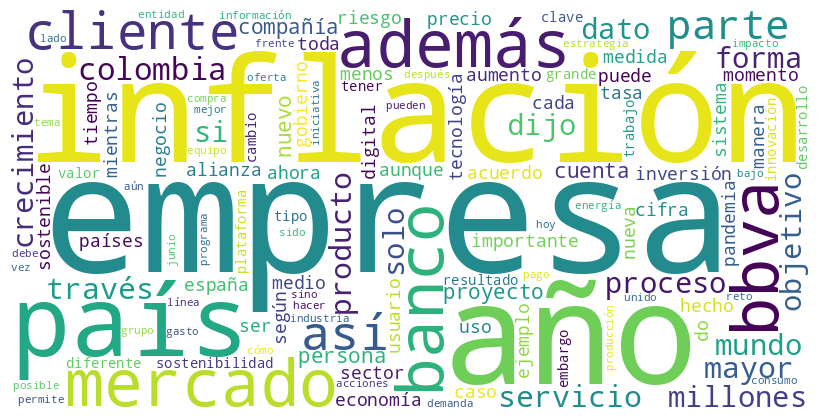

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Unimos todos los tokens sin stopwords en un solo texto
all_words = ' '.join([' '.join(tokens) for tokens in df['tokens_sin_stopwords']])

# creamso el objeto WordCloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white', #colores, etc
                      stopwords=stop_words_spanish,
                      min_font_size=10).generate(all_words)

#Visualizar el wordcloud
plt.figure(figsize=(8, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Las palabras mas grandes y prominentes en la imagen son las que aparecen con mayor frecuencia en el conjunto de noticias despues de haber eliminado las stopwords. En este caso, destacan palabras como empresa, inflación, país, mercado, banco (vemos bbva que es un banco), "año", "cliente", entre otras.

Las noticias en este dataset están fuertemente centradas en temas relacionados con empresas, la situacion economica (inflacion), el contexto geográfico ("pais"), el mercado financiero, instituciones bancarias y un horizonte temporal ("año").